In [54]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_df = pd.read_csv('../data/input/train.csv')
test_df = pd.read_csv('../data/input/test.csv')
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


# Duplicate

In [58]:
## patient_id
duplicate_ids = []

for id_ in tqdm(train_df['patient_id'].values):
    if id_ in test_df['patient_id'].values:
        duplicate_ids.append(id_)
duplicate_ids

[]

# Count

In [68]:
pd.concat([
    train_df['age_approx'].value_counts().sort_index(),
    test_df['age_approx'].value_counts().sort_index()
], axis=1)

,age_approx,age_approx
0.0,2,NaN
10.0,17,7.0
15.0,132,41.0
20.0,655,187.0
25.0,1544,298.0
30.0,2358,702.0
35.0,2850,1032.0
40.0,3576,1452.0
45.0,4466,1587.0
50.0,4270,1230.0


In [69]:
pd.concat([
    train_df['anatom_site_general_challenge'].value_counts().sort_index(),
    test_df['anatom_site_general_challenge'].value_counts().sort_index()
], axis=1)

,anatom_site_general_challenge,anatom_site_general_challenge
head/neck,1855,576
lower extremity,8417,2501
oral/genital,124,26
palms/soles,375,108
torso,16845,5847
upper extremity,4983,1573


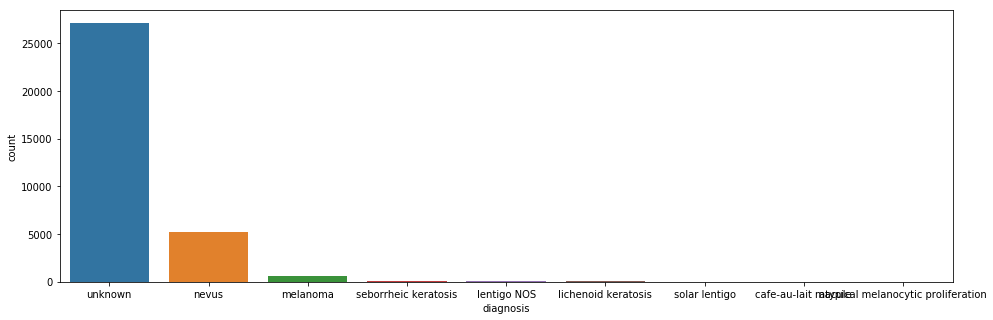

In [76]:
plt.figure(figsize=(16, 5))
sns.countplot(train_df['diagnosis'])

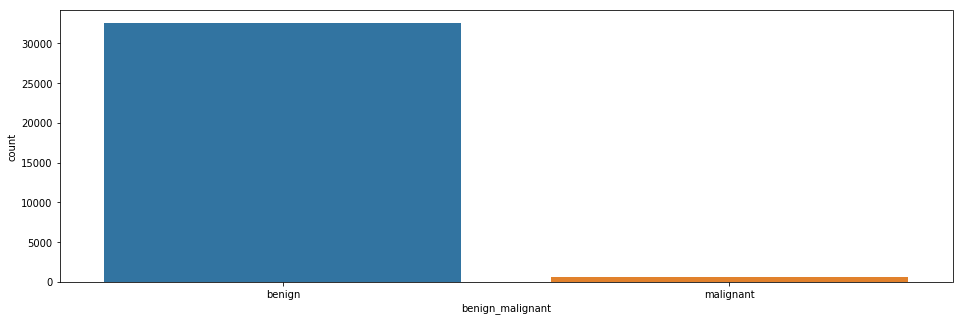

In [77]:
plt.figure(figsize=(16, 5))
sns.countplot(train_df['benign_malignant'])

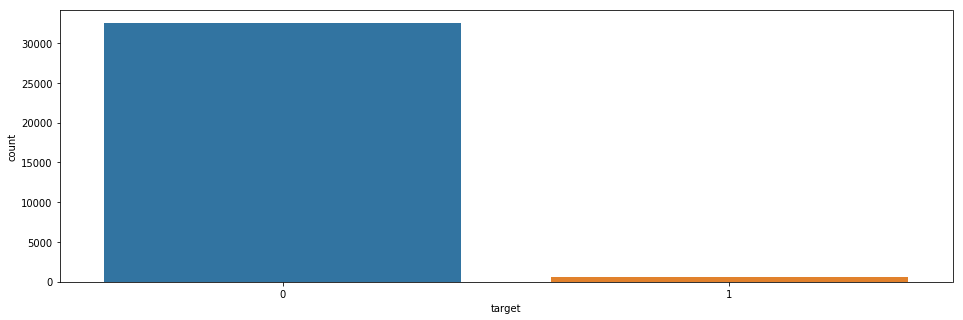

In [78]:
plt.figure(figsize=(16, 5))
sns.countplot(train_df['target'])

# Train vs Test

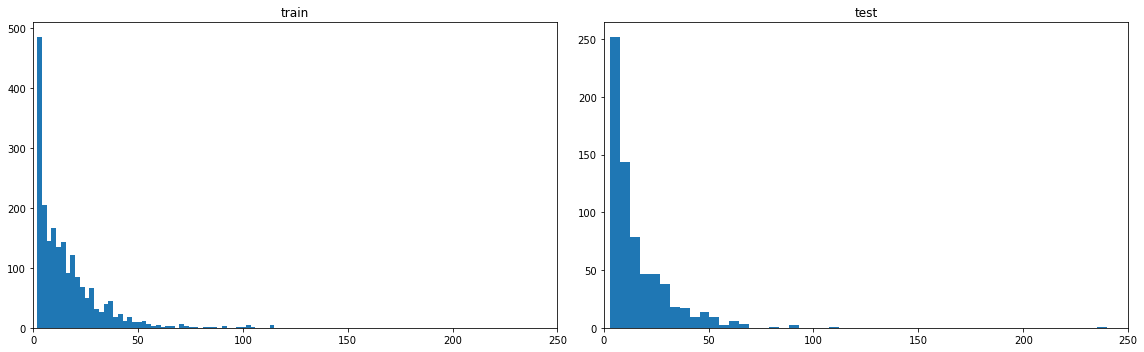

In [23]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['patient_id'].value_counts(), bins=50)
plt.xlim([0, 250])
plt.title('train')

plt.subplot(1, 2, 2)
plt.hist(test_df['patient_id'].value_counts(), bins=50)
plt.xlim([0, 250])
plt.title('test')

plt.tight_layout()

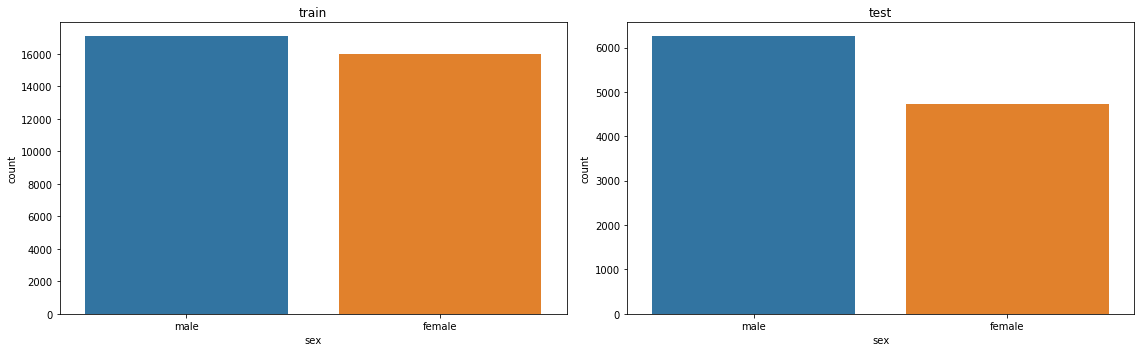

In [24]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(train_df['sex'])
plt.title('train')

plt.subplot(1, 2, 2)
sns.countplot(test_df['sex'])
plt.title('test')

plt.tight_layout()

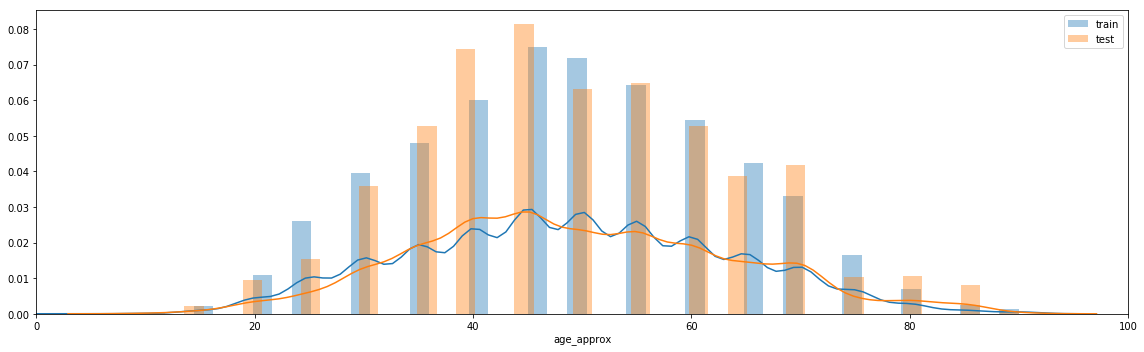

In [38]:
plt.figure(figsize=(16, 5))

sns.distplot(train_df['age_approx'].dropna(), label='train')
sns.distplot(test_df['age_approx'].dropna(), label='test')
plt.xlim([0, 100])
plt.legend()

plt.tight_layout()

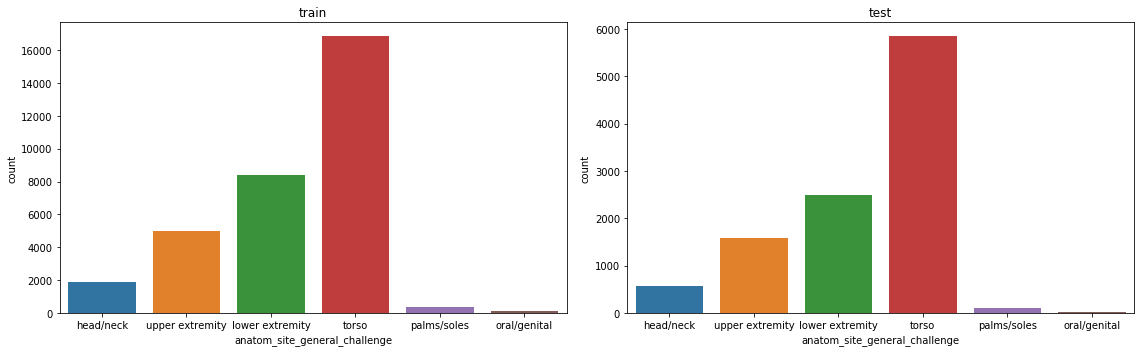

In [44]:
order = train_df['anatom_site_general_challenge'].dropna().unique()

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(train_df['anatom_site_general_challenge'], order=order)
plt.title('train')

plt.subplot(1, 2, 2)
sns.countplot(test_df['anatom_site_general_challenge'], order=order)
plt.title('test')

plt.tight_layout()

# Target vs Category

In [79]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


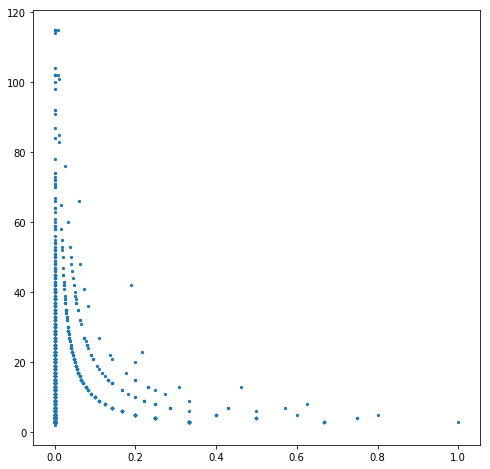

In [93]:
df = train_df.groupby('patient_id')['target'].mean().reset_index()
df['size'] = train_df.groupby('patient_id').size().values

plt.figure(figsize=(8, 8))
plt.scatter(df['target'], df['size'], s=5)

このカーブはなんだろう？<br>
一つだけ外れている値がある

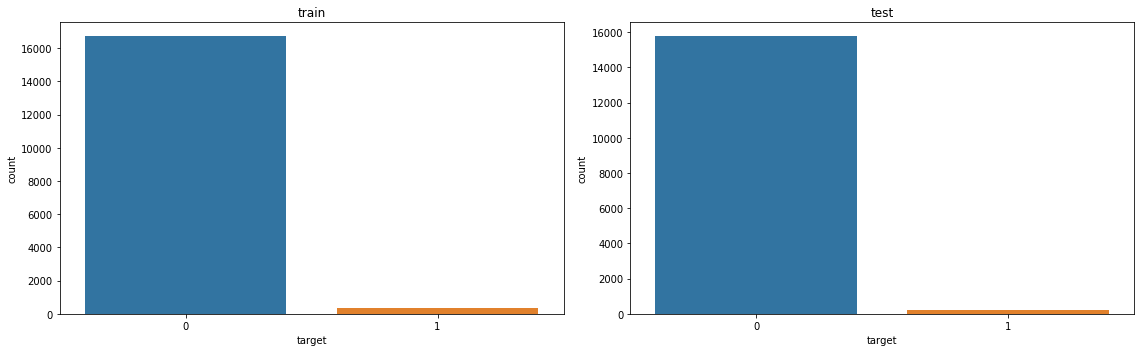

In [96]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(train_df[train_df['sex'] == 'male']['target'])
plt.title('train')

plt.subplot(1, 2, 2)
sns.countplot(train_df[train_df['sex'] == 'female']['target'])
plt.title('test')

plt.tight_layout()

In [99]:
train_df[train_df['sex'] == 'male']['target'].value_counts() / len(train_df[train_df['sex'] == 'male'])

0    0.978689
1    0.021311
Name: target, dtype: float64

In [100]:
train_df[train_df['sex'] == 'female']['target'].value_counts() / len(train_df[train_df['sex'] == 'female'])

0    0.986234
1    0.013766
Name: target, dtype: float64

男女比はあんまりなさそう？

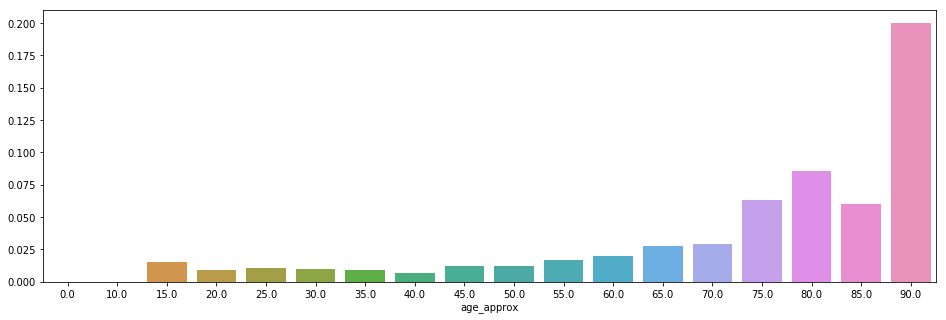

In [106]:
feats = train_df.groupby('age_approx')['target'].mean()

plt.figure(figsize=(16, 5))
sns.barplot(x=feats.index, y=feats.values)

年齢が高いほど疾患の割合が高い（それはそうだろう）

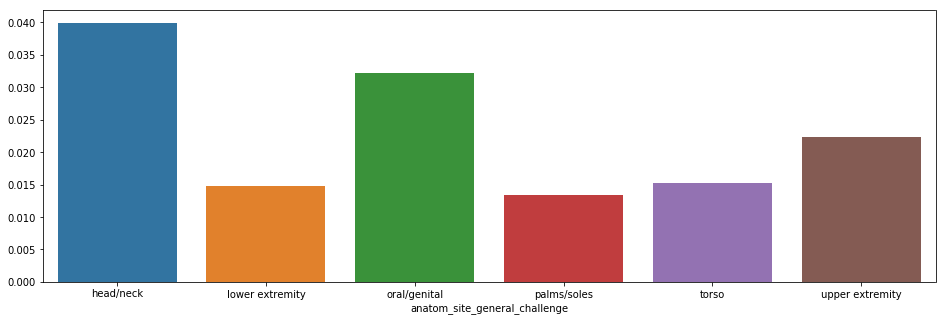

In [108]:
feats = train_df.groupby('anatom_site_general_challenge')['target'].mean()

plt.figure(figsize=(16, 5))
sns.barplot(x=feats.index, y=feats.values)

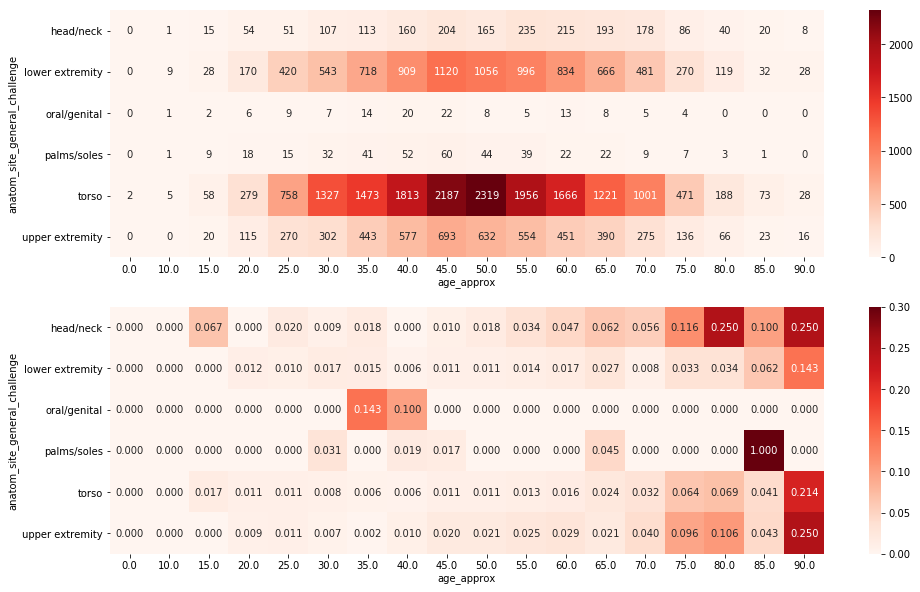

In [127]:
df = pd.pivot_table(data=train_df,
                                   index='anatom_site_general_challenge', 
                                   columns='age_approx', 
                                   values='target',
                                   fill_value=0,
                                   aggfunc=np.mean)

df_ = pd.pivot_table(data=train_df,
                                      index='anatom_site_general_challenge', 
                                      columns='age_approx', 
                                      values='target',
                                      fill_value=0,
                                      aggfunc='size')

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
sns.heatmap(df_, cmap='Reds', annot=True, fmt="d")

plt.subplot(2, 1, 2)
sns.heatmap(df, cmap='Reds', annot=True, fmt="1.3f", vmax=0.3)

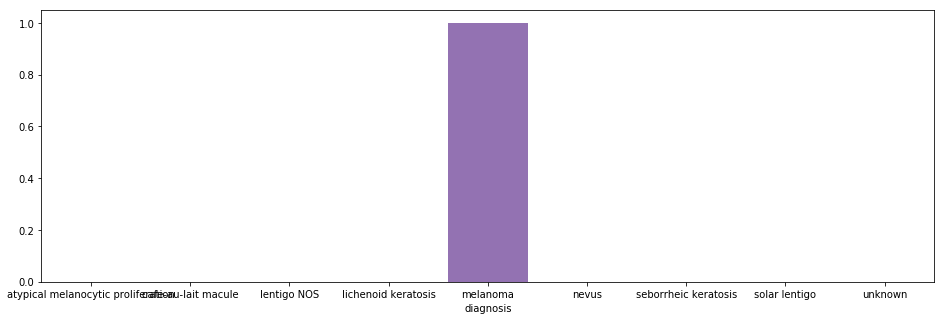

In [128]:
feats = train_df.groupby('diagnosis')['target'].mean()

plt.figure(figsize=(16, 5))
sns.barplot(x=feats.index, y=feats.values)

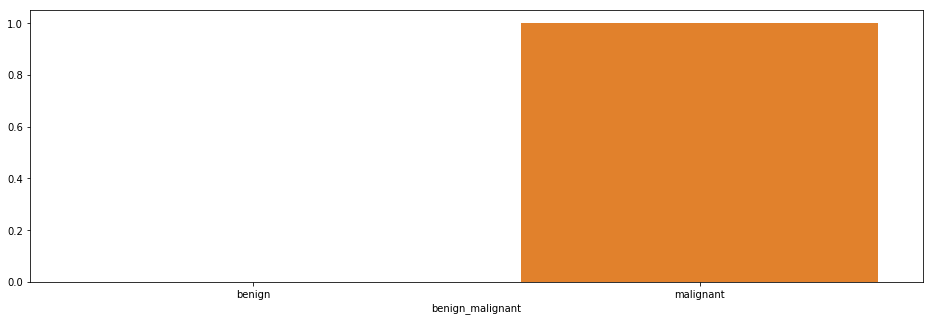

In [129]:
feats = train_df.groupby('benign_malignant')['target'].mean()

plt.figure(figsize=(16, 5))
sns.barplot(x=feats.index, y=feats.values)